In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [29]:
train_df = pd.read_csv('../data/airline-passenger-satisfaction/train.csv')
test_df = pd.read_csv('../data/airline-passenger-satisfaction/test.csv')

In [30]:
train_df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [31]:
all_features =train_df.columns.tolist()

In [32]:
cat_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 
                'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 
                'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 
                'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 
                'Inflight service', 'Cleanliness', 'satisfaction']

num_features = [f for f in all_features if f not in cat_features]

print("Numeric Features: ", num_features)

train_df[num_features].describe().round(1).T

Numeric Features:  ['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.5,29994.6,0.0,25975.8,51951.5,77927.2,103903.0
id,103904.0,64924.2,37463.8,1.0,32533.8,64856.5,97368.2,129880.0
Age,103904.0,39.4,15.1,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.4,997.1,31.0,414.0,843.0,1743.0,4983.0
Departure Delay in Minutes,103904.0,14.8,38.2,0.0,0.0,0.0,12.0,1592.0
Arrival Delay in Minutes,103594.0,15.2,38.7,0.0,0.0,0.0,13.0,1584.0


In [33]:
train_df[['Unnamed: 0', 'id']].head()

,Unnamed: 0,id
0,0,70172
1,1,5047
2,2,110028
3,3,24026
4,4,119299


In [34]:
test_df[['Unnamed: 0', 'id']].head()

,Unnamed: 0,id
0,0,19556
1,1,90035
2,2,12360
3,3,77959
4,4,36875


In [35]:
# Drop unnamed and ID columns for bothe dataframes

train_df.drop(train_df.columns[0], axis=1, inplace=True)
test_df.drop(test_df.columns[0], axis=1, inplace=True)

train_df.drop(columns=['id'], errors='ignore', inplace=True)
test_df.drop(columns=['id'], errors='ignore', inplace=True)

In [36]:
train_df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [37]:
# lets create satisfaction feature with summing up some assesments
train_df['sum_assessments'] = train_df['Inflight wifi service'] + train_df['Online boarding'] + train_df['Gate location'] + train_df['Baggage handling'] 
+ train_df['Checkin service'] + train_df['Seat comfort'] + train_df['Inflight service'] + train_df['Cleanliness']

0         19
1          7
2         18
3          9
4         14
          ..
103899     9
103900    19
103901    19
103902    11
103903     9
Length: 103904, dtype: int64

In [38]:
train_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,sum_assessments
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,11
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,12
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,13
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,12
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,15


In [39]:
test_df['sum_assessments'] = test_df['Inflight wifi service'] + test_df['Online boarding'] + test_df['Gate location'] + test_df['Baggage handling'] 
+ test_df['Checkin service'] + test_df['Seat comfort'] + test_df['Inflight service'] + test_df['Cleanliness']

0        15
1        17
2         8
3        12
4        12
         ..
25971    17
25972    18
25973    13
25974    17
25975     5
Length: 25976, dtype: int64

In [40]:
# lets create feature to calculate Delay changes during flight
train_df['Delay Change During Flight'] = train_df['Arrival Delay in Minutes'] - train_df['Departure Delay in Minutes']
test_df['Delay Change During Flight'] = test_df['Arrival Delay in Minutes'] - test_df['Departure Delay in Minutes']

In [41]:
flight_features = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Delay Change During Flight']

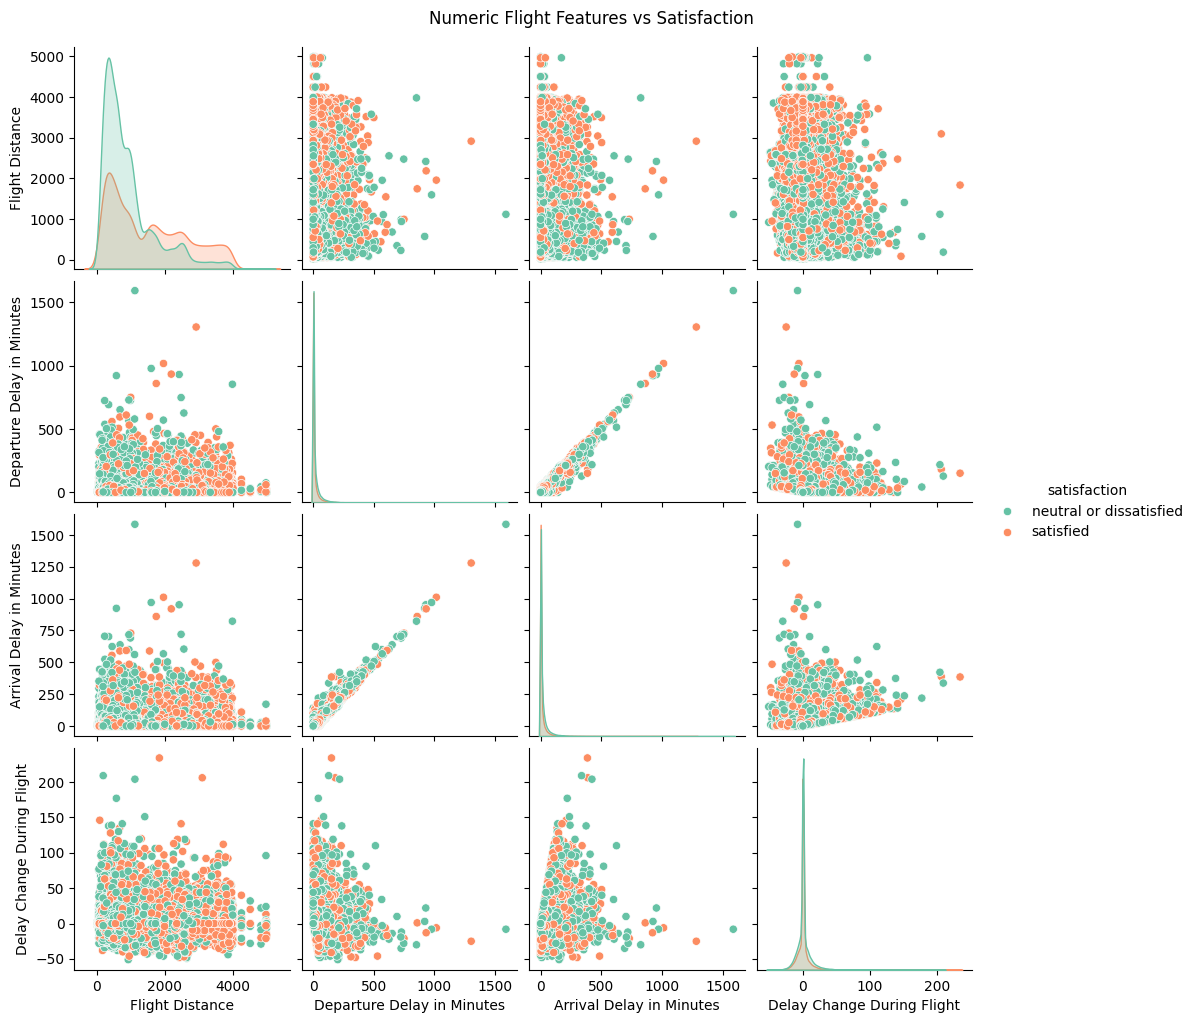

In [43]:
sns.pairplot(train_df[flight_features + ['satisfaction']], hue='satisfaction', diag_kind='kde', palette='Set2')
plt.suptitle("Numeric Flight Features vs Satisfaction", y=1.02)
plt.show()

In [44]:
import pandas as pd
import numpy as np
from scipy import stats

# Pearson and Spearman between two Series
r_pearson = train_df['Departure Delay in Minutes'].corr(train_df['Arrival Delay in Minutes'], method='pearson')
r_spearman = train_df['Departure Delay in Minutes'].corr(train_df['Arrival Delay in Minutes'], method='spearman')

# With p-values (Pearson)
r, p = stats.pearsonr(train_df['Departure Delay in Minutes'], train_df['Arrival Delay in Minutes'])

# Correlation matrix (Pearson by default)
features = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Delay Change During Flight']
corr_mat = train_df[features].corr()

# Spearman matrix (more robust for skewed delays)
spearman_mat = train_df[features].corr(method='spearman')

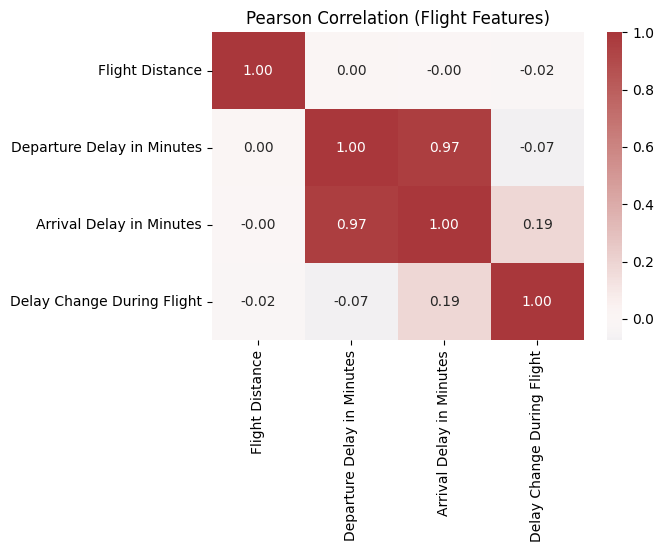

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='vlag', center=0)
plt.title('Pearson Correlation (Flight Features)')
plt.show()